In [1]:
!pip install plotly
!pip install plotly --upgrade
!wget https://raw.githubusercontent.com/Vakihito/Wild-Life-Simulation/main/data.csv

     |████████████████████████████████| 13.2MB 321kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
--2020-12-30 23:16:47--  https://raw.githubusercontent.com/Vakihito/Wild-Life-Simulation/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6773 (6.6K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   6.61K  --.-KB/s    in 0s      

2020-12-30 23:16:48 (78.2 MB/s) - ‘data.csv’ saved [6773/6773]



In [2]:
import pandas as pd
fileName = 'data.csv'
samplesN = 500
df = pd.read_csv(fileName)
df

,geração,radius,energia,pontos,velocidade,percepcao,distance,meanDistance
0,1,0.054473,15.700838,97.0,0.978082,0.654578,0.000000,0.507699
1,1,0.057225,18.743040,76.0,0.830591,0.471101,0.274062,0.507699
2,1,0.049497,17.393677,68.0,0.798908,0.432272,0.334361,0.507699
3,1,0.040816,24.196194,60.0,0.731903,0.507482,0.336250,0.507699
4,1,0.055143,17.470970,46.0,0.745600,0.460253,0.336298,0.507699
...,...,...,...,...,...,...,...,...
95,10,0.100000,9.750000,42.0,1.000000,0.800000,0.137459,0.364805
96,10,0.046652,18.601059,38.0,0.839981,0.512223,0.599673,0.364805
97,10,0.075322,16.923416,36.0,0.579921,0.800000,0.506223,0.364805
98,10,0.047511,16.156374,32.0,0.955528,0.400000,0.639468,0.364805


In [3]:
def normalize(arr):
    maxi = max(arr)
    arr = [float(i)/float(maxi) for i in arr]
    return arr

radius = df['radius'][0:samplesN].tolist()
radius = normalize(radius)
velocidade = df["velocidade"][0:samplesN].tolist()
velocidade = normalize(velocidade)
percep = df["percepcao"][0:samplesN].tolist()
percep = normalize(percep)


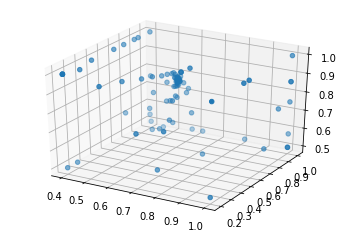

In [4]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(radius, velocidade, percep)
plt.show()

In [5]:
import plotly.graph_objects as go
import numpy as np


def plotGeneration(generation=None, N=10, zoom=True):
    dfa = df[:][:N]
    if generation != None:
        dfa = df[:].loc[df['geração'] == generation]
    x = normalize(dfa['radius'].tolist())
    y = normalize(dfa['velocidade'].tolist())
    z = normalize(dfa['percepcao'].tolist())
    pontos = normalize(dfa['pontos'].tolist())
    

    fig = go.Figure(
        layout = go.Layout(
            title="Geração : " + str(generation),
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0
            ),
            scene = dict(
            xaxis = dict(
                title='radius'),
            yaxis = dict(
                title='velocidade'),
            zaxis = dict(
                title='percepcao'),),
            
            


        ),
        data=[go.Scatter3d(
                name="color = pontos",
                showlegend=True,
                x=x,
                y=y,
                z=z,
                mode='markers',
                marker=dict(
                    size=12,
                    color= pontos,                # set color to an array/list of desired values
                    colorscale='Viridis',   # choose a colorscale
                    opacity=0.8
                )
            )]
        )

    # tight layout
    if (zoom):
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    else:
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
        
    fig.show()

plotGeneration(1,zoom=False)

In [6]:
plotGeneration(N=500)

In [10]:
import plotly.express as px

def plotGeneration(generation=None, N=10, zoom=True):
    global df
    dfa = df[:][:N]
    if generation != None:
        dfa = df[:].loc[df['geração'] == generation]
    cols_to_norm = ['radius','velocidade', 'percepcao', 'pontos']
    dfa[cols_to_norm] = dfa[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    fig = px.scatter_3d(dfa, x='radius', y='velocidade', z='percepcao',
                color='pontos', size='pontos', size_max=18, opacity=0.7)

    # tight layout
    if (zoom):
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    else:
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
    fig.show()    
    print(dfa)


plotGeneration(generation=10,zoom=False)

    geração    radius    energia  ...  percepcao  distance  meanDistance
90       10  1.000000  17.750000  ...   0.725082  0.000000      0.364805
91       10  1.000000  23.750000  ...   0.152277  0.286402      0.364805
92       10  1.000000  25.750000  ...   0.506567  0.109258      0.364805
93       10  1.000000  17.689556  ...   0.158463  0.386351      0.364805
94       10  0.189698  13.587180  ...   0.453445  0.453113      0.364805
95       10  1.000000   9.750000  ...   1.000000  0.137459      0.364805
96       10  0.000000  18.601059  ...   0.280557  0.599673      0.364805
97       10  0.537415  16.923416  ...   1.000000  0.506223      0.364805
98       10  0.016102  16.156374  ...   0.000000  0.639468      0.364805
99       10  1.000000  10.738231  ...   0.506350  0.165297      0.364805

[10 rows x 8 columns]


In [11]:
plotGeneration(generation=11,zoom=False)


Empty DataFrame
Columns: [geração, radius, energia, pontos, velocidade, percepcao, distance, meanDistance]
Index: []


In [9]:
plotGeneration(N=500,zoom=False)


    geração    radius    energia  ...  percepcao  distance  meanDistance
0         1  0.241217  15.700838  ...   0.636445  0.000000      0.507699
1         1  0.287083  18.743040  ...   0.177753  0.274062      0.507699
2         1  0.158283  17.393677  ...   0.080680  0.334361      0.507699
3         1  0.013600  24.196194  ...   0.268705  0.336250      0.507699
4         1  0.252383  17.470970  ...   0.150632  0.336298      0.507699
..      ...       ...        ...  ...        ...       ...           ...
95       10  1.000000   9.750000  ...   1.000000  0.137459      0.364805
96       10  0.110867  18.601059  ...   0.280557  0.599673      0.364805
97       10  0.588700  16.923416  ...   1.000000  0.506223      0.364805
98       10  0.125183  16.156374  ...   0.000000  0.639468      0.364805
99       10  1.000000  10.738231  ...   0.506350  0.165297      0.364805

[100 rows x 8 columns]
